In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_1200.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_1299.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_7667.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_2201.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_240.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_9580.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_1011.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_791.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_3932.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_6702.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_707.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_3186.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_5361.tiff
/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_4408.tiff
/kaggle/i

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For working with images
from PIL import Image

# For building the CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-05-09 07:17:17.510138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 07:17:17.510338: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 07:17:17.679033: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Sample image filenames:
['Sample_1200.tiff', 'Sample_1299.tiff', 'Sample_7667.tiff', 'Sample_2201.tiff', 'Sample_240.tiff']


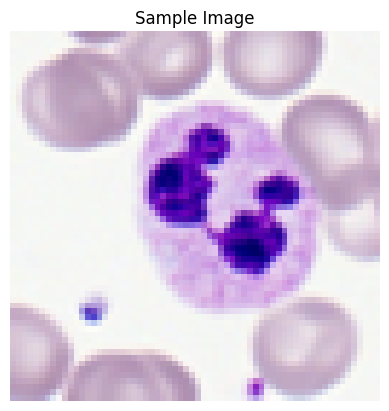

Sample Label: Sample


In [3]:
# Path to the dataset
dataset_path = "/kaggle/input/blood-cancer-image-dataset/Blood_Cancer"

# Getting list of image filenames
image_filenames = os.listdir(dataset_path)

# Displaying the first few filenames
print("Sample image filenames:")
print(image_filenames[:5])

# Choose a sample image and load it
sample_image_path = os.path.join(dataset_path, image_filenames[0])
sample_image = Image.open(sample_image_path)

# Display the image
plt.imshow(sample_image)
plt.title("Sample Image")
plt.axis("off")
plt.show()

# Extracting label from filename
sample_label = image_filenames[0].split("_")[0]
print("Sample Label:", sample_label)


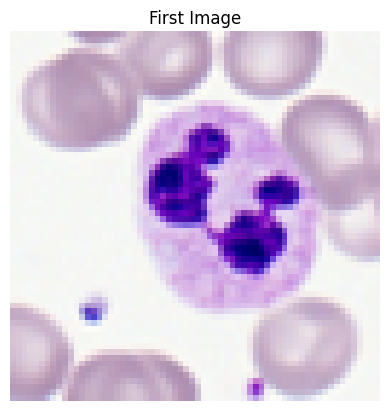

Sample Label: Sample


In [4]:
# Choose the first image and load it
first_image_path = os.path.join(dataset_path, image_filenames[0])
first_image = Image.open(first_image_path)

# Display the image
plt.imshow(first_image)
plt.title("First Image")
plt.axis("off")
plt.show()

# Extracting label from filename
sample_label = image_filenames[0].split("_")[0]
print("Sample Label:", sample_label)


In [5]:
# Define image dimensions
img_width, img_height = 64, 64

# Resize images and convert to array
images = []
labels = []

for filename in image_filenames:
    # Load image
    image_path = os.path.join(dataset_path, filename)
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    
    # Extract label from filename
    label = filename.split("_")[0]
    
    # Append image and label to lists
    images.append(image_array)
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Display shape of images and labels arrays
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


Shape of images array: (10000, 64, 64, 4)
Shape of labels array: (10000,)


In [6]:
# Check number of channels in the images
unique_channels = np.unique([image.shape[2] for image in images])
print("Unique channels found in images:", unique_channels)

# Check if there are any images with an unexpected number of channels
unexpected_channels = [i for i, image in enumerate(images) if image.shape[2] != 3]
print("Indices of images with unexpected number of channels:", unexpected_channels)



Unique channels found in images: [4]
Indices of images with unexpected number of channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203

In [10]:
# Print filenames of images with unexpected number of channels
for i in unexpected_channels:
    print("Filename:", image_filenames[i])

# Check if there are any images with more than 3 channels
problematic_indices = [i for i in unexpected_channels if images[i].shape[2] > 3]
print("Indices of images with more than 3 channels:", problematic_indices)


Filename: Sample_1200.tiff
Filename: Sample_1299.tiff
Filename: Sample_7667.tiff
Filename: Sample_2201.tiff
Filename: Sample_240.tiff
Filename: Sample_9580.tiff
Filename: Sample_1011.tiff
Filename: Sample_791.tiff
Filename: Sample_3932.tiff
Filename: Sample_6702.tiff
Filename: Sample_707.tiff
Filename: Sample_3186.tiff
Filename: Sample_5361.tiff
Filename: Sample_4408.tiff
Filename: Sample_2889.tiff
Filename: Sample_3679.tiff
Filename: Sample_4854.tiff
Filename: Sample_4328.tiff
Filename: Sample_1949.tiff
Filename: Sample_1855.tiff
Filename: Sample_5438.tiff
Filename: Sample_4866.tiff
Filename: Sample_3999.tiff
Filename: Sample_765.tiff
Filename: Sample_8388.tiff
Filename: Sample_5704.tiff
Filename: Sample_9068.tiff
Filename: Sample_7150.tiff
Filename: Sample_3863.tiff
Filename: Sample_3667.tiff
Filename: Sample_6253.tiff
Filename: Sample_8096.tiff
Filename: Sample_5062.tiff
Filename: Sample_3790.tiff
Filename: Sample_5596.tiff
Filename: Sample_6859.tiff
Filename: Sample_8903.tiff
Filen

In [11]:
# Reload the entire dataset and ensure images have 3 channels
images = []
labels = []

for filename in image_filenames:
    image_path = os.path.join(dataset_path, filename)
    image = Image.open(image_path)
    image = image.convert("RGB")  # Convert to RGB format
    image_array = np.array(image)
    
    # If image has an alpha channel, discard it
    if image_array.shape[2] > 3:
        image_array = image_array[:, :, :3]
    
    images.append(image_array)
    labels.append(filename.split("_")[0])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Re-check number of channels in the images
unique_channels = np.unique([image.shape[2] for image in images])
print("Unique channels found in images after conversion:", unique_channels)


Unique channels found in images after conversion: [3]


In [12]:
from sklearn.model_selection import train_test_split

# Define the split ratio
test_size = 0.2

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=42)

# Display the shapes of the training and testing sets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


Training images shape: (8000, 64, 64, 3)
Training labels shape: (8000,)
Testing images shape: (2000, 64, 64, 3)
Testing labels shape: (2000,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import numpy as np

# Convert labels to numpy array
train_labels_np = np.array(train_labels)
test_labels_np = np.array(test_labels)

# Convert labels to binary format
train_labels_binary = (train_labels_np == 'Leukemia').astype(int)
test_labels_binary = (test_labels_np == 'Leukemia').astype(int)


In [17]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model
history = model.fit(train_images, train_labels_binary, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels_binary))


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
250/250 ━━━━━━━━━━

In [19]:
# Predict labels for the test set
y_pred = model.predict(test_images)

# Adjust predicted probabilities to binary format
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(test_labels_binary, y_pred_binary)
print(report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [20]:
# Save the model
model.save("LeukoNet_model.h5")
